<a href="https://colab.research.google.com/github/DarkStar1709/CS114.L21/blob/main/colab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/CS114/

/content/drive/MyDrive/CS114


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
wecode = pd.read_csv('wecode.csv') 
# Lọc ra những dũ liệu cần thiết
wecode = wecode[['user_id', 'assignment_id', 'problem_id', 'is_final', 'status', 'pre_score', 'coefficient', 'id']]
score = pd.read_csv('score_training.csv')
# Lọc ra điểm ck để vẽ scatter plot
score = score[['id','CK']]
score = score.replace(r'^\s*$', np.nan, regex=True)
score = score.astype({'id' : int,'CK': float})

In [ ]:
wecode

,user_id,assignment_id,problem_id,is_final,status,pre_score,coefficient,id
0,4,0,3,1,SCORE,10000,100,4
1,4,0,4,1,SCORE,10000,100,5
2,4,0,5,0,Compilation Error,0,100,6
3,4,0,5,0,Compilation Error,0,100,7
4,4,0,5,0,Compilation Error,0,100,8
...,...,...,...,...,...,...,...,...
264601,1796,0,25,0,SCORE,0,100,266667
264602,1796,0,25,0,Compilation Error,0,100,266668
264603,1796,0,25,1,SCORE,10000,100,266669
264604,255,0,150,1,SCORE,6250,100,266670


In [ ]:
score = score.rename(columns = {"id":"user_id"})
score = score[['user_id','CK']]
score = score.dropna()
score

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10.0
3,28,9.5
4,29,8.5
...,...,...
970,1857,4.0
971,1859,1.5
972,1862,7.5
973,1865,7.5


Các yếu tố ảnh hưởng đến điểm cuối kì:
1. Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit
2. Tổng số problem đã sumbit / Tổng số submissions 
3. Số lần submit đúng (pre_score=10000) / tổng số submissions 
4. Tổng pre_score của các submssion có is_final = 1 
5. Trung bình cộng của tỷ lệ: problem đã submit/số lượng problem của mỗi assignments 
6. Tổng của max pre_score của mỗi problem_id và tổng số submissions
7. Trung bình cộng (thời điểm submit cuối cùng - thời điểm submit đầu tiên của mỗi problem)

## 1.Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit

In [ ]:
Feature_1 = pd.DataFrame(wecode['user_id'])
Feature_1['sum_problem'] = pd.DataFrame(wecode['is_final'])
Feature_1['sum_done_problem'] = pd.DataFrame(map(int, (wecode['is_final'] == 1) & (wecode['pre_score'] == 10000)))
Feature_1 = Feature_1.groupby(['user_id']).sum()
Feature_1['sum_done_problem / sum_problem'] = Feature_1['sum_done_problem'] / Feature_1['sum_problem']
Feature_1

,sum_problem,sum_done_problem,sum_done_problem / sum_problem
user_id,,,
1,2,1,0.500000
4,38,37,0.973684
5,5,3,0.600000
6,88,85,0.965909
7,2,0,0.000000
...,...,...,...
1860,48,28,0.583333
1862,6,4,0.666667
1864,63,28,0.444444


In [ ]:
data_merge_1 = pd.merge(Feature_1,score,on='user_id',how='outer')
data_merge_1 = data_merge_1.dropna()
data_merge_1 = data_merge_1.sort_values(by= ['CK'], ascending=False)
data_merge_1

,user_id,sum_problem,sum_done_problem,sum_done_problem / sum_problem,CK
10,27,5.0,3.0,0.600000,10.0
174,343,191.0,166.0,0.869110,10.0
9,24,77.0,72.0,0.935065,9.5
933,1570,182.0,176.0,0.967033,9.5
987,1639,177.0,173.0,0.977401,9.5
...,...,...,...,...,...
37,76,29.0,28.0,0.965517,0.0
969,1619,114.0,107.0,0.938596,0.0
563,960,87.0,83.0,0.954023,0.0
561,956,63.0,56.0,0.888889,0.0


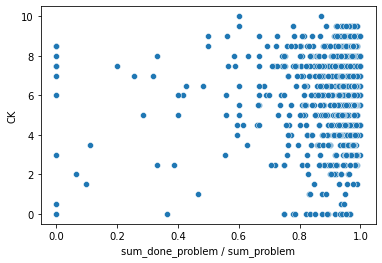

In [ ]:
sns.scatterplot(x="sum_done_problem / sum_problem", y="CK", data = data_merge_1)

## 2.Tổng số problem đã sumbit / Tổng số submissions

In [ ]:
Feature_2 = pd.DataFrame(wecode['user_id'])
Feature_2['sum_problem'] = pd.DataFrame(wecode['is_final'])
Feature_2 = Feature_2.groupby(['user_id']).sum()
sum_submissions = wecode[["user_id", "id"]].groupby("user_id").count()
Feature_2 = pd.merge(Feature_2,sum_submissions,on='user_id',how='outer')
Feature_2 = Feature_2.rename(columns = {"id":"sum_submissions"})
Feature_2['sum_problem / sum_submissions'] = Feature_2['sum_problem'] / Feature_2['sum_submissions']
Feature_2

,sum_problem,sum_submissions,sum_problem / sum_submissions
user_id,,,
1,2,2,1.000000
4,38,54,0.703704
5,5,6,0.833333
6,88,130,0.676923
7,2,5,0.400000
...,...,...,...
1860,48,76,0.631579
1862,6,12,0.500000
1864,63,187,0.336898


In [ ]:
data_merge_2 = pd.merge(Feature_2,score,on='user_id',how='outer')
data_merge_2 = data_merge_2.dropna()
data_merge_2 = data_merge_2.sort_values(by= ['CK'], ascending=False)
data_merge_2

,user_id,sum_problem,sum_submissions,sum_problem / sum_submissions,CK
10,27,5.0,13.0,0.384615,10.0
174,343,191.0,345.0,0.553623,10.0
9,24,77.0,164.0,0.469512,9.5
765,1316,47.0,122.0,0.385246,9.5
64,126,110.0,383.0,0.287206,9.5
...,...,...,...,...,...
969,1619,114.0,288.0,0.395833,0.0
472,823,48.0,109.0,0.440367,0.0
563,960,87.0,114.0,0.763158,0.0
561,956,63.0,173.0,0.364162,0.0


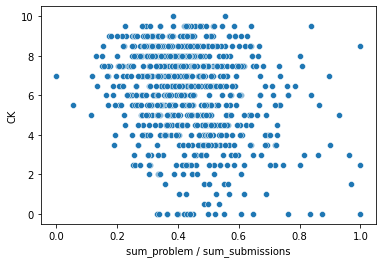

In [ ]:
sns.scatterplot(x="sum_problem / sum_submissions", y="CK", data = data_merge_2)

## 3.Số lần submit đúng (pre_score=10000) / tổng số submissions

In [ ]:
Feature_3 = pd.DataFrame(wecode['user_id'])
Feature_3['sum_done_submissions'] = pd.DataFrame(map(int, (wecode['pre_score'] == 10000)))
Feature_3 = Feature_3.groupby(['user_id']).sum()
Feature_3 = pd.merge(Feature_3,sum_submissions,on='user_id',how='outer')
Feature_3 = Feature_3.rename(columns = {"id":"sum_submissions"})
Feature_3['sum_done_submissions / sum_submissions'] = Feature_3['sum_done_submissions'] / Feature_3['sum_submissions']
Feature_3

,sum_done_submissions,sum_submissions,sum_done_submissions / sum_submissions
user_id,,,
1,1,2,0.500000
4,44,54,0.814815
5,3,6,0.500000
6,89,130,0.684615
7,0,5,0.000000
...,...,...,...
1860,29,76,0.381579
1862,4,12,0.333333
1864,30,187,0.160428


In [ ]:
data_merge_3 = pd.merge(Feature_3,score,on='user_id',how='outer')
data_merge_3 = data_merge_3.dropna()
data_merge_3 = data_merge_3.sort_values(by= ['CK'], ascending=False)
data_merge_3

,user_id,sum_done_submissions,sum_submissions,sum_done_submissions / sum_submissions,CK
10,27,4.0,13.0,0.307692,10.0
174,343,168.0,345.0,0.486957,10.0
9,24,80.0,164.0,0.487805,9.5
765,1316,46.0,122.0,0.377049,9.5
64,126,129.0,383.0,0.336815,9.5
...,...,...,...,...,...
969,1619,109.0,288.0,0.378472,0.0
472,823,46.0,109.0,0.422018,0.0
563,960,85.0,114.0,0.745614,0.0
561,956,64.0,173.0,0.369942,0.0


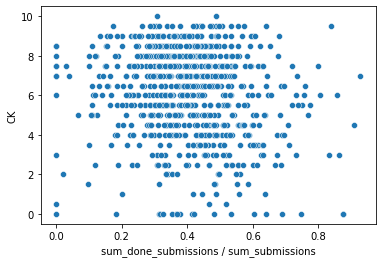

In [ ]:
sns.scatterplot(x="sum_done_submissions / sum_submissions", y="CK", data = data_merge_3)

## 4.Tổng pre_score của các submssion có is_final = 1

In [ ]:
Feature_4 = pd.DataFrame(wecode['user_id'])
Feature_4['sum_pre_score'] = wecode.loc[wecode['is_final'] == 1, ['pre_score']]
Feature_4 = Feature_4.groupby(['user_id']).sum()
Feature_4

,sum_pre_score
user_id,
1,10000.0
4,370000.0
5,30000.0
6,850000.0
7,9209.0
...,...
1860,329665.0
1862,40000.0
1864,439741.0


In [ ]:
data_merge_4 = pd.merge(Feature_4,score,on='user_id',how='outer')
data_merge_4 = data_merge_4.dropna()
data_merge_4 = data_merge_4.sort_values(by= ['CK'], ascending=False)
data_merge_4

,user_id,sum_pre_score,CK
10,27,39000.0,10.0
174,343,1821760.0,10.0
9,24,750299.0,9.5
765,1316,460000.0,9.5
64,126,1085882.0,9.5
...,...,...,...
969,1619,1080200.0,0.0
472,823,460000.0,0.0
563,960,832428.0,0.0
561,956,600776.0,0.0


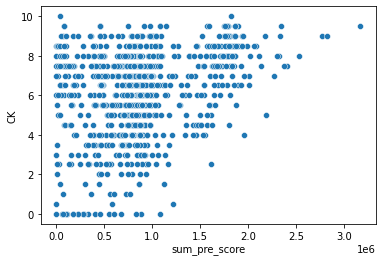

In [ ]:
sns.scatterplot(x="sum_pre_score", y="CK", data = data_merge_4)

## 5.Trung bình cộng của tỷ lệ: problem đã submit/số lượng problem của mỗi assignments

In [ ]:
count_problem = wecode.groupby('assignment_id', as_index=False).problem_id.nunique()
count_problem = count_problem.rename(columns = {"problem_id":"count_problem"})
count_problem

,assignment_id,count_problem
0,0,352
1,5,4
2,7,10
3,8,8
4,10,7
...,...,...
285,376,10
286,377,7
287,381,4
288,383,47


In [ ]:
count_problem_submit = pd.DataFrame(wecode[['user_id', 'assignment_id','problem_id']])
count_problem_submit = count_problem_submit.groupby(['user_id', 'assignment_id'], as_index=False).problem_id.nunique()
count_problem_submit = count_problem_submit.rename(columns = {"problem_id":"count_problem_submit"})
count_problem_submit


,user_id,assignment_id,count_problem_submit
0,1,0,2
1,4,0,41
2,5,64,1
3,5,91,2
4,5,117,1
...,...,...,...
12360,1865,296,4
12361,1868,0,13
12362,1868,271,5
12363,1868,272,5


In [ ]:
Feature_5 = pd.merge(count_problem_submit,count_problem,on='assignment_id',how='left')
Feature_5['count_problem_submit / count_problem'] = Feature_5['count_problem_submit'] / Feature_5['count_problem']
sum_probability = Feature_5[['user_id','count_problem_submit / count_problem']].groupby(['user_id'], as_index=True).sum()
count_probability = Feature_5[['user_id','count_problem_submit / count_problem']].groupby(['user_id'], as_index=True).count()
Feature_5 = Feature_5[['user_id']].groupby(['user_id'], as_index=True).count()
Feature_5['average_of_count_problem_submit / count_problem'] = sum_probability['count_problem_submit / count_problem'] / count_probability['count_problem_submit / count_problem']
Feature_5

,average_of_count_problem_submit / count_problem
user_id,
1,0.005682
4,0.116477
5,0.114394
6,0.306203
7,0.005682
...,...
1860,0.615000
1862,0.450000
1864,0.690000


In [ ]:
data_merge_5 = pd.merge(Feature_5,score,on='user_id',how='outer')
data_merge_5 = data_merge_5.dropna()
data_merge_5 = data_merge_5.sort_values(by= ['CK'], ascending=False)
data_merge_5

,user_id,average_of_count_problem_submit / count_problem,CK
10,27,0.223643,10.0
174,343,0.903905,10.0
9,24,0.663333,9.5
765,1316,1.000000,9.5
64,126,0.877598,9.5
...,...,...,...
969,1619,0.762672,0.0
472,823,0.940000,0.0
563,960,0.988889,0.0
561,956,0.852083,0.0


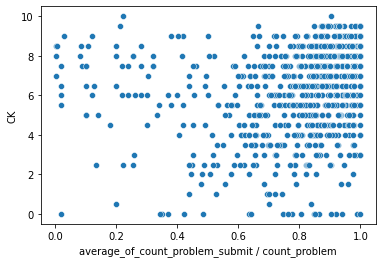

In [ ]:
sns.scatterplot(x="average_of_count_problem_submit / count_problem", y="CK", data = data_merge_5)

## 6.Tổng của max pre_score của mỗi problem_id và tổng số submissions
- Tổng max pre_score của mỗi problem_id như Feature_4. Do đó chỉ làm tổng số submissions

In [ ]:
data_merge_6 = data_merge_3[['user_id','sum_submissions','CK']]
data_merge_6 = data_merge_6.sort_values(by= ['CK'], ascending=False)
data_merge_6

,user_id,sum_submissions,CK
10,27,13.0,10.0
174,343,345.0,10.0
160,310,407.0,9.5
1040,1706,387.0,9.5
774,1328,671.0,9.5
...,...,...,...
874,1471,61.0,0.0
704,1215,109.0,0.0
405,714,35.0,0.0
82,166,32.0,0.0


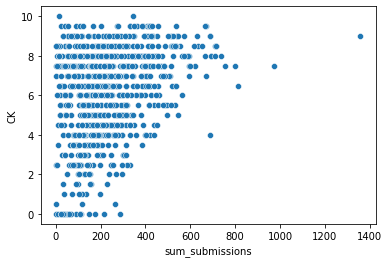

In [ ]:
sns.scatterplot(x="sum_submissions", y="CK", data = data_merge_6)

## Training và tìm mean square error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error